# Regular expressions

Unicode ranges for emoji are:

('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').

In [1]:
from nltk import word_tokenize
word_tokenize("The cat is in the box. The cat box.")

['The', 'cat', 'is', 'in', 'the', 'box', '.', 'The', 'cat', 'box', '.']

In [2]:
from collections import Counter
Counter(word_tokenize("The cat is in the box. The cat box."))

Counter({'The': 2, 'cat': 2, 'is': 1, 'in': 1, 'the': 1, 'box': 2, '.': 2})

In [3]:
Counter(word_tokenize("The cat is in the box. The cat box."))['cat']

2

In [4]:
from nltk.stem import WordNetLemmatizer

In [5]:
WordNetLemmatizer().lemmatize('words')

'word'

# Simple topic identification

## gensim

Popular open-source NLP library
* Uses top academic models to perform complex tasks
    * Latent Semantic Analysis (LSA/LSI/SVD)
    * Latent Dirichlet Allocation (LDA)
    * Random Projections (RP)
    * Hierarchical Dirichlet Process (HDP)
    * word2vec deep learning.
* Building document or word vectors
* Performing topic identification and document comparison

In [6]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

In [7]:
my_documents = ['The movie was about a spaceship and aliens.',
'I really liked the movie!',
'Awesome action scenes, but boring characters.',
'The movie was awful! I hate alien films.',
'Space is cool! I liked the movie.',
'More space films, please!',]

In [8]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
tokenized_docs

[['the', 'movie', 'was', 'about', 'a', 'spaceship', 'and', 'aliens', '.'],
 ['i', 'really', 'liked', 'the', 'movie', '!'],
 ['awesome', 'action', 'scenes', ',', 'but', 'boring', 'characters', '.'],
 ['the', 'movie', 'was', 'awful', '!', 'i', 'hate', 'alien', 'films', '.'],
 ['space', 'is', 'cool', '!', 'i', 'liked', 'the', 'movie', '.'],
 ['more', 'space', 'films', ',', 'please', '!']]

Passing the tokenized documents to the Gensim Dictionary class. This will create a mapping with an id for each token. This is the beginning of our corpus.

We can take a look at the tokens and their ids by looking at the token2id attribute, which is a dictionary of all of our tokens and their respective ids in our new dictionary. 

In [9]:
dictionary = Dictionary(tokenized_docs)
dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

Using the dictionary we built in the last slide, we can then create a Gensim corpus. This is a bit different than a normal corpus -- which is just a collection of documents. Gensim uses a simple bag-of-words model which transforms each document into a bag of words using the token ids and the frequency of each token in the document.

In [10]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

Here, we can see that the Gensim corpus is a list of lists, each list item representing one document.  
Each document a series of tuples, the first item representing the tokenid from the dictionary and the second item representing the token frequency in the document.  
In only a few lines, we have a new bag-of-words model and corpus thanks to Gensim.  
And unlike our previous Counter-based bag of words, this Gensim model can be easily saved, updated and reused thanks to the extra tools we have available in Gensim.  
Our dictionary can also be updated with new texts and extract only words that meet particular thresholds.  
We are building a more advanced and feature-rich bag-of-words model which can then be used for future exercises. 

## Creating and querying a corpus with gensim

In [11]:
import pandas as pd
from nltk import regexp_tokenize
# with open('News articles/articles.txt', "r") as f:
with open('Wikipedia articles/wiki_text_computer.txt', "r") as f:
    articles = f.readlines()
articles = [regexp_tokenize(article.lower(), r'\w+') for article in articles]
articles

[['redirect',
  'computer',
  'system',
  'computer',
  'disambiguation',
  'and',
  'computer',
  'system',
  'disambiguation'],
 ['pp', 'semi', 'indef'],
 ['pp', 'move', 'indef'],
 ['infobox', 'title', 'computer'],
 ['image', 'div', 'style', 'white', 'space', 'nowrap'],
 ['file',
  'acer',
  'aspire',
  '8920',
  'gemstone',
  'by',
  'georgy',
  'jpg',
  'x81pxfile',
  'columbia',
  'supercomputer',
  'nasa',
  'advanced',
  'supercomputing',
  'facility',
  'jpg',
  'x81pxfile',
  'intertec',
  'superbrain',
  'jpg',
  'x81px',
  'br',
  'file',
  '2010',
  '01',
  '26',
  'technikkrempel',
  'by',
  'ralfr',
  '05',
  'jpg',
  'x79pxfile',
  'thinking',
  'machines',
  'connection',
  'machine',
  'cm',
  '5',
  'frostburg',
  '2',
  'jpg',
  'x79pxfile',
  'g5',
  'supplying',
  'wikipedia',
  'via',
  'gigabit',
  'at',
  'the',
  'lange',
  'nacht',
  'der',
  'wissenschaften',
  '2006',
  'in',
  'dresden',
  'jpg',
  'x79px',
  'br',
  'file',
  'dm',
  'ibm',
  's360',
  'jp

In [12]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)
dictionary.token2id

{'and': 0,
 'computer': 1,
 'disambiguation': 2,
 'redirect': 3,
 'system': 4,
 'indef': 5,
 'pp': 6,
 'semi': 7,
 'move': 8,
 'infobox': 9,
 'title': 10,
 'div': 11,
 'image': 12,
 'nowrap': 13,
 'space': 14,
 'style': 15,
 'white': 16,
 '01': 17,
 '05': 18,
 '2': 19,
 '2006': 20,
 '2010': 21,
 '26': 22,
 '5': 23,
 '8920': 24,
 'acer': 25,
 'acorn': 26,
 'advanced': 27,
 'aspire': 28,
 'at': 29,
 'bbc': 30,
 'br': 31,
 'by': 32,
 'cm': 33,
 'columbia': 34,
 'connection': 35,
 'dell': 36,
 'der': 37,
 'dm': 38,
 'dresden': 39,
 'facility': 40,
 'file': 41,
 'frostburg': 42,
 'g5': 43,
 'gemstone': 44,
 'georgy': 45,
 'gigabit': 46,
 'ibm': 47,
 'in': 48,
 'intertec': 49,
 'jpg': 50,
 'lange': 51,
 'machine': 52,
 'machines': 53,
 'master': 54,
 'microcomputer': 55,
 'nacht': 56,
 'nasa': 57,
 'poweredge': 58,
 'ralfr': 59,
 's360': 60,
 'series': 61,
 'servers': 62,
 'superbrain': 63,
 'supercomputer': 64,
 'supercomputing': 65,
 'supplying': 66,
 'technikkrempel': 67,
 'the': 68,
 'th

In [13]:
# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")
print(computer_id)

1


In [14]:
# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

computer


In [15]:
# Create a Corpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

In [16]:
# Print the first 10 word ids with their frequency counts from the fith document
print(corpus[4])

[(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


## Gensim bag-of-words

In [17]:
from collections import defaultdict
import itertools

Print the top 5 words of the document alongside the count

In [18]:
doc = corpus[4]
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

div 1
image 1
nowrap 1
space 1
style 1


Print the top 5 words across all documents alongside the count

In [19]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

the 657
of 404
computer 304
and 269
a 264


## Tf-idf with gensim

In [20]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)

Index the tfidf model by passing a corpus document

In [21]:
print(corpus[4])

[(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [22]:
tfidf[corpus[4]]

[(11, 0.37255346141310175),
 (12, 0.3362223999925717),
 (13, 0.4506892257130436),
 (14, 0.37255346141310175),
 (15, 0.4506892257130436),
 (16, 0.4506892257130436)]

In [23]:
# query the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[0:5])

[(11, 0.37255346141310175), (12, 0.3362223999925717), (13, 0.4506892257130436), (14, 0.37255346141310175), (15, 0.4506892257130436)]


In [24]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

nowrap 0.4506892257130436
style 0.4506892257130436
white 0.4506892257130436
div 0.37255346141310175
space 0.37255346141310175


# Named-entity recognition

* NLP task to identify important named entities in the text
    * People, places, organizations
    * Dates, states, works of art
    * ... and other categories!
* Can be used alongside topic identification
    * ... or on its own!
* Who? What? When? Where?

In [25]:
from nltk import pos_tag, ne_chunk

In [26]:
sentence = '''In New York, I like to ride the Metro to
visit MOMA and some restaurants rated
well by Ruth Reichl.'''
tokenized_sent = word_tokenize(sentence)
print(tokenized_sent)

['In', 'New', 'York', ',', 'I', 'like', 'to', 'ride', 'the', 'Metro', 'to', 'visit', 'MOMA', 'and', 'some', 'restaurants', 'rated', 'well', 'by', 'Ruth', 'Reichl', '.']


In [27]:
tagged_sent = pos_tag(tokenized_sent)
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [28]:
print(ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


## NER with NLTK

In [29]:
with open('News articles/uber_apple.txt', "r") as f:
    articles = ' '.join(f.readlines())
articles

'\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\n \n \n Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they 

In [30]:
from nltk import sent_tokenize, ne_chunk_sents
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(articles)
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [pos_tag(sent) for sent in token_sentences] 
# Create the named entity chunks: chunked_sentences
chunked_sentences = ne_chunk_sents(pos_sentences)

In [31]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):# and chunk.label() == "NE":
            print(chunk)

(GPE Beyond/NN)
(PERSON Apple/NNP)
(PERSON Travis/NNP Kalanick/NNP)
(PERSON Tim/NNP Cook/NNP)
(PERSON Apple/NNP)
(PERSON Silicon/NNP)
(PERSON Valley/NNP)
(ORGANIZATION CEO/NNP)
(GPE Yahoo/NNP)
(PERSON Marissa/NNP Mayer/NNP)


## Charting

In [32]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)
# Create the nested for loop
chunked_sentences = ne_chunk_sents(pos_sentences)
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
ner_categories

defaultdict(int, {'GPE': 2, 'PERSON': 7, 'ORGANIZATION': 1})

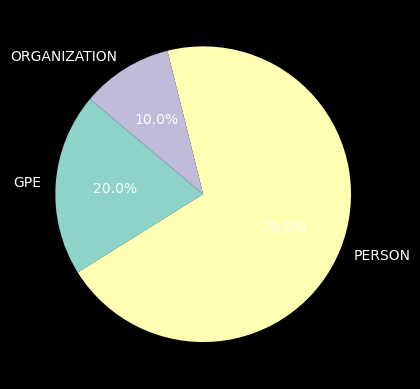

In [33]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
# Display the chart
plt.show()

## Spacy

In [34]:
import spacy

In [35]:
spacy.prefer_gpu()

True

In [36]:
spacy.require_gpu()

True

In [37]:
nlp = spacy.load('en_core_web_trf')

In [38]:
doc = nlp("""Berlin is the capital of Germany;
and the residence of Chancellor Angela Merkel.""")
doc.ents

(Berlin, Germany, Angela Merkel)

In [39]:
(doc.ents[0].text, doc.ents[0].label_)

('Berlin', 'GPE')

## Articles

In [40]:
doc = nlp(articles)
# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
ORG Uber
ORG unroll.me
ORG unroll.me
ORG Apple
ORG Uber
ORG Uber
ORG Uber
ORG Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


## Multilingual NER with polyglot

In [41]:
# import polyglot

# Building a "fake news" classifier

You'll apply the basics of what you've learned along with some supervised machine learning to build a "fake news" detector. You'll begin by learning the basics of supervised machine learning, and then move forward by choosing a few important features and testing ideas to identify and classify fake news articles.

In [42]:
# missing dataset